In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from scipy import stats
from matplotlib.mlab import normpdf

sns.set()
sns.set_color_codes()

sns.set_style("dark")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#plt.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format='retina'

In [3]:
# generate array of numbers represent card values

cards = (range(1, 10) + [10] * 3) * 4
print cards

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10]


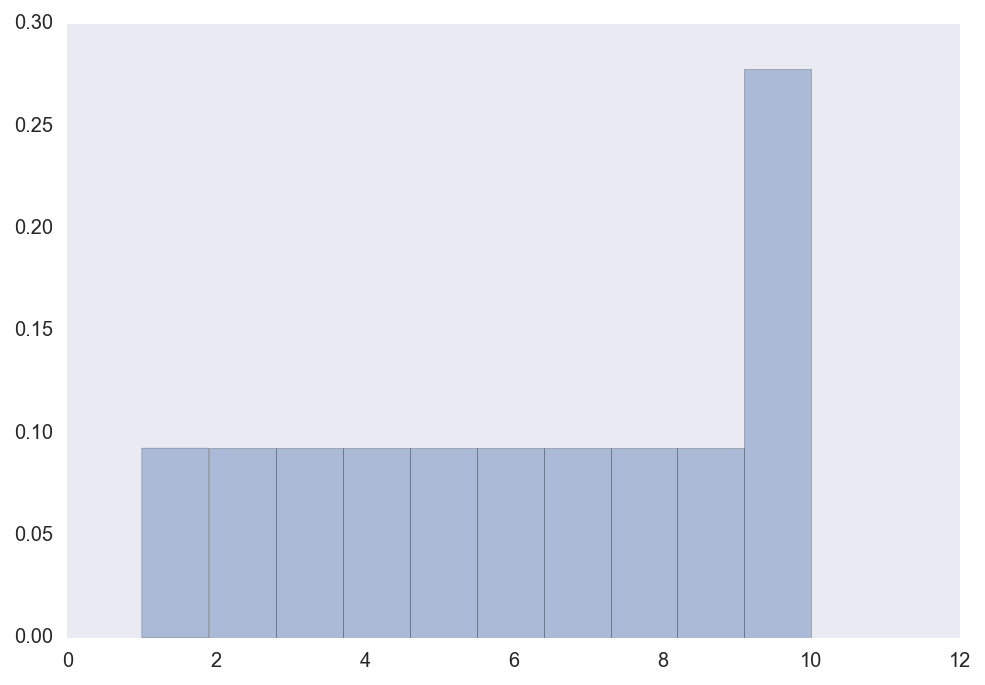

In [4]:
# plot a relative frequency histogram of the card values

sns.distplot(cards, bins=len(np.unique(cards)), kde=False, norm_hist=True)

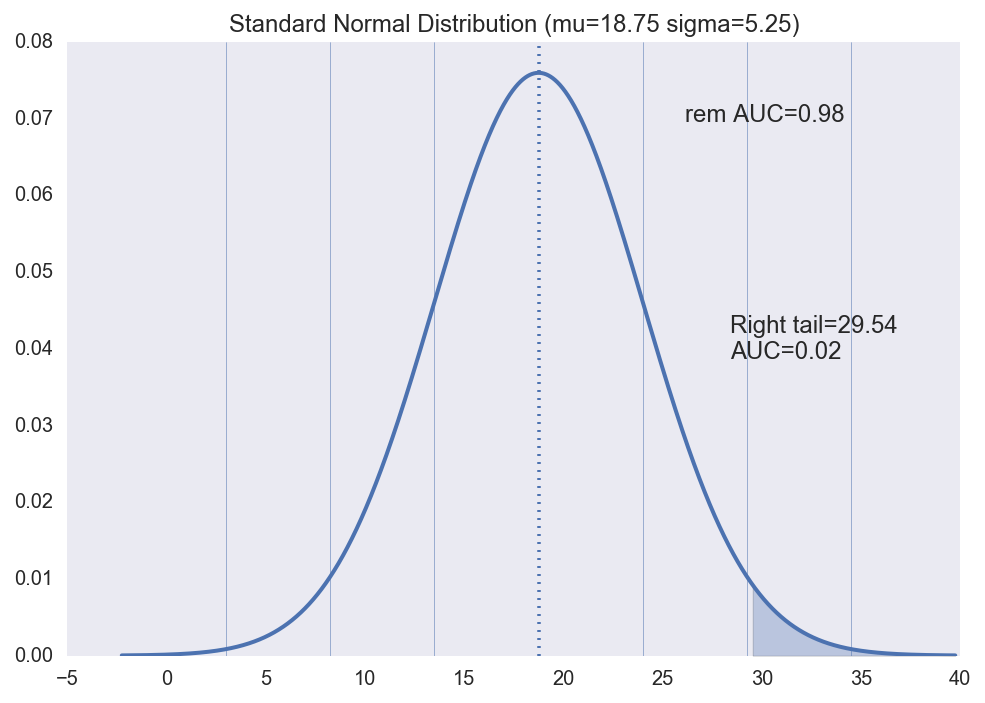

In [5]:
def norm_plotx(
    mu=0,
    sigma=1,
    left_tail=None,
    right_tail=None,
    left_auc=None,
    right_auc=None):

    lower = mu - (4 * sigma)
    upper = mu + (4 * sigma)

    x = np.arange(lower, upper, .01)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, lw=2)


    #ax = plt.axes()
    #ax.xaxis.grid(color='b', lw=.25)

    plt.axvline(x=mu, linestyle='dotted')

    for i in [-3, -2, -1, 1, 2, 3]:
        plt.axvline(x=mu + (i * sigma), lw=.25)
        
    if left_auc:
        left_tail = stats.norm.ppf(left_auc, mu, sigma)
    else:
        left_auc = 0

    if left_tail:
        x_0 = np.arange(lower, left_tail, .01)
        y_0 = normpdf(x_0, mu, sigma)
        plt.fill_between(x_0, y_0, alpha=.3)
        left_auc = stats.norm.cdf(left_tail, mu, sigma)
        plt.figtext(.2, .5, 'Left tail=%.2f\nAUC=%.2f' % (left_tail, left_auc))
    
    if right_auc:
        right_tail = stats.norm.ppf(1 - right_auc, mu, sigma)
    else:
        right_auc = 0

    if right_tail:
        x_1 = np.arange(right_tail, upper, .01)
        y_1 = normpdf(x_1, mu, sigma)
        plt.fill_between(x_1, y_1, alpha=.3)

        right_auc = 1 - stats.norm.cdf(right_tail, mu, sigma)
        plt.figtext(.7, .5, 'Right tail=%.2f\nAUC=%.2f' % (right_tail, right_auc))

    
    
    rem_auc = 1 - left_auc - right_auc
    plt.figtext(.8, .8, 'rem AUC=%.2f' % rem_auc, ha='right')
    plt.title('Standard Normal Distribution (mu=%.2f sigma=%.2f)' % (mu, sigma))
        
norm_plotx(mu=18.75, sigma=5.2522342, right_auc=.02)

In [6]:
import sys
sys.path.append('../src')

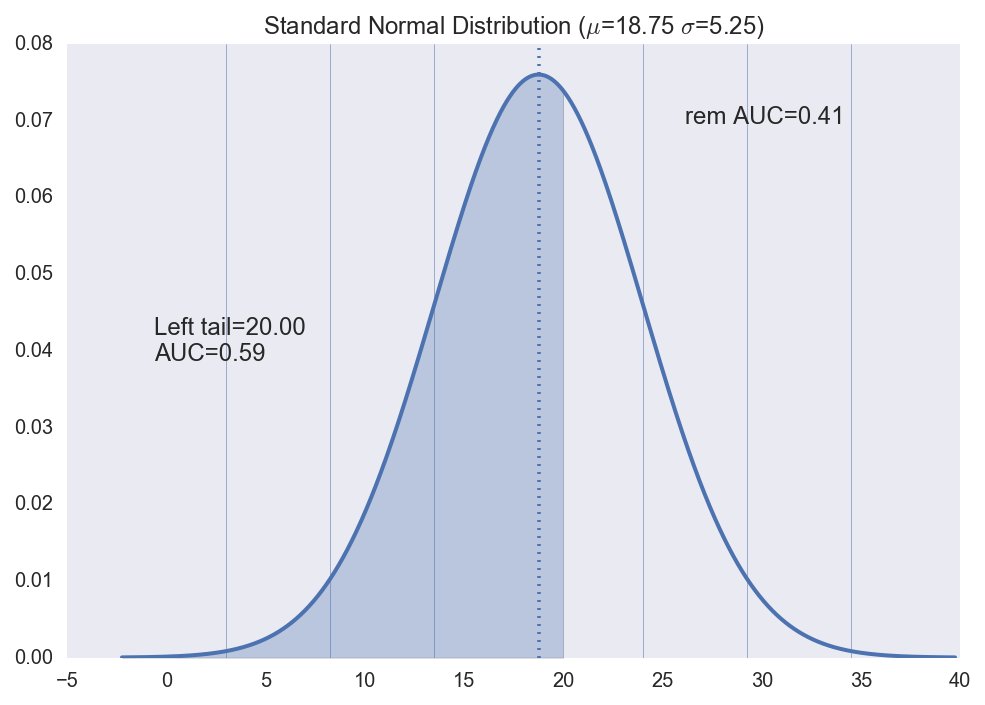

In [10]:
import plotutils
plotutils.norm_plot(18.75, 5.25, left_tail=20)

In [23]:
import requests

response = requests.get('https://www.random.org/integers/?num=1000&min=1&max=10000000&col=1&base=10&format=plain&rnd=id.c4d1a193-f384-4842-b528-f783d2c00f73')
data = response.content.strip().split('\n')
seeds = map(lambda x: int(float(x)), data)
print seeds

[1997445, 9865235, 1533932, 2720212, 3590836, 3073229, 3525965, 4505569, 6192473, 8412487, 9674035, 6908265, 958414, 4410419, 2949607, 9652463, 2700145, 2070314, 2320236, 2425797, 4448136, 8686376, 3670281, 306586, 7691163, 5723428, 9893170, 5300269, 7074521, 2832970, 9435434, 6209081, 5061911, 9282313, 8383454, 8176513, 8740724, 8429806, 341002, 5359901, 7456861, 2649760, 1994816, 5041120, 4720716, 4858689, 6096114, 986891, 64087, 2164640, 2479810, 7285132, 6623896, 4791598, 2525178, 2428392, 4668936, 8124177, 9020011, 2713831, 3142673, 1221287, 4970283, 2773504, 4877082, 9830808, 5278378, 1698333, 9306169, 2473035, 6712655, 311146, 6846582, 3508105, 518918, 2097327, 8067864, 932015, 7537547, 4195839, 3795928, 211987, 1800033, 7870880, 2083991, 5705691, 396554, 7829762, 4369320, 3030322, 9745600, 246448, 9179955, 5909799, 1411034, 4965085, 7263626, 2973336, 7754665, 5135416, 7719043, 5049625, 9386437, 3001215, 530020, 2345263, 7729856, 6387042, 2596976, 9926721, 9463379, 6951119, 3594